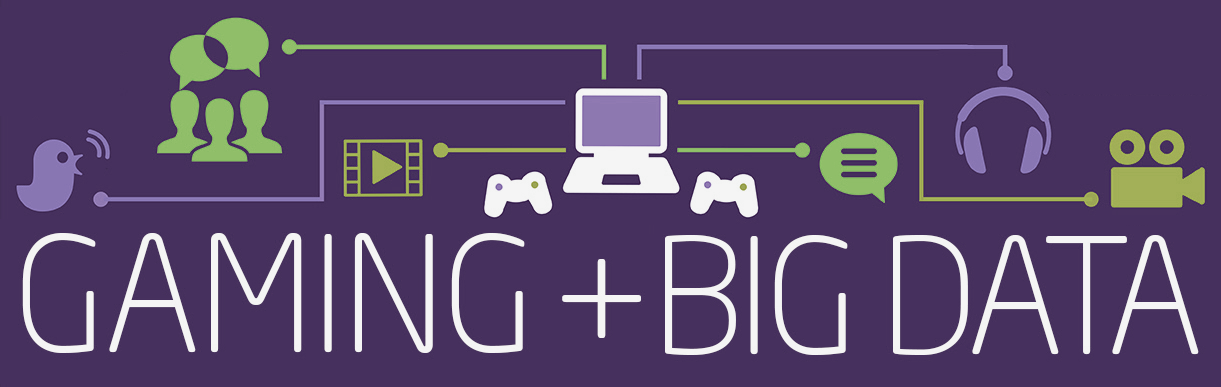

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎮 **"GameData Argentina: Análisis de Datos en la Industria de Videojuegos"** 🎮</b></div>

**Introducción:**
Bienvenidos a GameData Argentina, líderes en el análisis de datos en la industria de videojuegos en Argentina. En GameData, estamos dedicados a proporcionar información valiosa y análisis profundos que ayudan a las empresas en la industria de los videojuegos a tomar decisiones estratégicas basadas en datos sólidos.

**Nuestra Misión:**
Nuestra misión es impulsar el éxito de las empresas de videojuegos en Argentina al ofrecer análisis de datos precisos y perspicaces que revelen tendencias, oportunidades y áreas de mejora dentro de la industria.

**Nuestros Servicios:**

Análisis de ventas y tendencias de mercado.
Estudios de mercado personalizados.
Predicción de ventas y demanda.
Segmentación de audiencia y análisis de jugadores.
Recomendaciones de marketing basadas en datos.
Equipo Local Expertos:
Contamos con un equipo de expertos apasionados por los videojuegos y con amplia experiencia en análisis de datos. Nuestro conocimiento profundo de la industria nos permite ofrecer soluciones personalizadas para cada cliente.



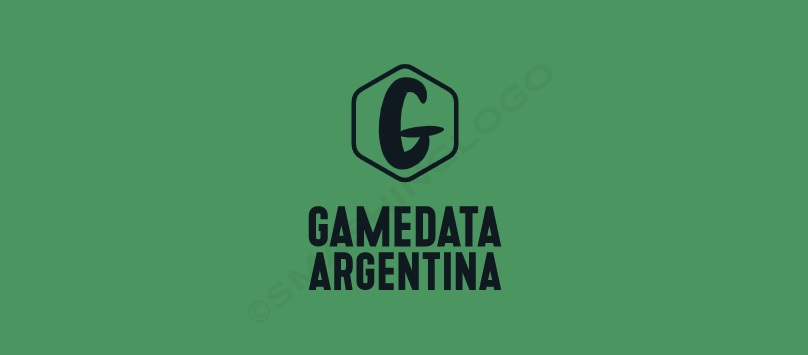

**Objetivos:**
Proporcionar información precisa y oportuna: El principal objetivo es ofrecer a los clientes datos precisos y oportunos sobre las ventas de videojuegos, lo que les permitiría tomar decisiones informadas en tiempo real.

Ayudar a las empresas a aumentar sus ventas: centrarse en ayudar a los clientes a identificar oportunidades de mercado y estrategias de marketing efectivas para aumentar sus ventas y rentabilidad.

Desarrollar soluciones innovadoras: creación de soluciones innovadoras y tecnologías avanzadas para el análisis de datos en la industria de videojuegos, lo que permitiría diferenciarse en el mercado.

Fomentar alianzas estratégicas: Establecer alianzas estratégicas con otras empresas de la industria de videojuegos podría ser un objetivo para aumentar el alcance y capacidad de servicio.



 **Abstract**

 Elegí una base de datos relacionada a los videojuegos. Esto se debe principalmente a que es uno de mis hobbies favoritos. Me interesa conocer la industria y también analizar el comportamiento de los jugadores a lo largo de la historia. Qué fue lo más jugado en el pasado, qué se juega ahora. Realmente creo que es una rama fundamental de la cultura popular mundial y un arte que crece día a día. Entretenimiento, historias, amistades.

Dicha base de datos nos presenta los juegos que han salido a la venta a lo largo de la historia, hasta el año 2016 aproximadamente. Tenemos el año de publicación de cada juego, así como también el género y la productora. Y, lo más importante, datos de ventas. Podemos observar las ventas totales y divididas por locación. Europa, EEUU, Japón y "otros". Estos 3 grandes mercados son los principales en la industria de los videojuegos. Suma también información sobre la valoración que han recibido los juegos de parte de los especialistas y los jugadores regulares.

La fuente de esta base de datos es https://www.kaggle.com/.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Importación del dataset y librerías 📚</b></div>

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Montar Google Drive ☁️​

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/Coderhouse Maestu/Data Science /"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Coderhouse Maestu/Data Science 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Dataset ⏳</b></div>

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Coderhouse Maestu/Data Science /Video_Games.csv')

# 🗂️ **Data Wrangling** 🗂️

In [5]:
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


Chequeamos la cantidad de valores nulos en cada columna.

**✂️ Manejo de valores faltantes ✂️**

Para las columnas **Name, Genre y Publisher**, que tienen muy pocos valores faltantes, eliminamos las filas que tienen esos valores faltantes ya que la pérdida de datos será mínima.


In [6]:
# Eliminamos filas con valores faltantes en las columnas Name, Genre y Publisher
df.dropna(subset=['Name', 'Genre', 'Publisher'], inplace=True)

Para la ***columna Year_of_Release,*** llenamos los valores faltantes con  la *mediana* del año de lanzamiento.

Debido a que son varios los datos faltantes, es necesario rellenar con algún método. Aunque es evidente que no va a reflejar la realidad.

Buscar la fecha de salida de cada juego faltante (247) es demasiado trabajo para este caso simulado.

In [7]:
median_year = df['Year_of_Release'].median()
df['Year_of_Release'].fillna(median_year, inplace=True)

Una vez completado estas primeras columnas, vemos cómo seguir:

In [8]:
# Calcular la cantidad de valores nulos en todas las columnas
nulos_por_columna = df.isnull().sum()

# Calcular el porcentaje de valores nulos sobre el total
total_filas = len(df)
porcentaje_nulos = (nulos_por_columna / total_filas) * 100

# Mostrar los resultados
for columna, cantidad_nulos, porcentaje in zip(nulos_por_columna.index, nulos_por_columna, porcentaje_nulos):
    print(f'La columna {columna} tiene {cantidad_nulos} valores nulos, lo que representa el {porcentaje:.2f}% del total de filas.')

La columna Name tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna Platform tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna Year_of_Release tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna Genre tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna Publisher tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna NA_Sales tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna EU_Sales tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna JP_Sales tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna Other_Sales tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna Global_Sales tiene 0 valores nulos, lo que representa el 0.00% del total de filas.
La columna Critic_Score tiene 8530 valores nulos, lo que representa el 51.19% del total de f

Dejamos escrito el resultado que nos llama la atención para tratar:

La columna Critic_Score tiene 8530 valores nulos, lo que representa el **51.19% del total de filas.**

La columna Critic_Count tiene 8530 valores nulos, lo que representa el **51.19% del total de filas.**

La columna User_Score tiene 6656 valores nulos, lo que representa el **39.94% del total de filas.**

La columna User_Count tiene 9079 valores nulos, lo que representa el **54.49% del total de filas.**

La columna Developer tiene 6576 valores nulos, lo que representa el **39.46% del total de filas.**

La columna Rating tiene 6720 valores nulos, lo que representa el
**40.33% del total de filas.**

Teniendo en cuenta que en esas columnas los porcentajes de nulos son muy altos, considero que la mejor opción será eliminar directamente las columnas.

In [9]:
# Eliminar las columnas
columnas_a_eliminar = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
df = df.drop(columnas_a_eliminar, axis=1)

Continuamos, ahora verificamos **que no haya datos duplicados.**

In [10]:
# Verificar duplicados basados en las columnas 'name' y 'platform'
duplicados = df[df.duplicated(subset=['Name', 'Platform'], keep=False)]

# Mostrar los registros duplicados
print(duplicados)

                              Name Platform  Year_of_Release   Genre  \
604                  Madden NFL 13      PS3           2012.0  Sports   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
5973   Need for Speed: Most Wanted       PC           2005.0  Racing   
11716  Need for Speed: Most Wanted       PC           2012.0  Racing   
16233                Madden NFL 13      PS3           2012.0  Sports   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
604    Electronic Arts      2.11      0.22      0.00         0.23   
1190   Electronic Arts      0.62      0.78      0.01         0.15   
1591   Electronic Arts      1.00      0.13      0.02         0.10   
5973   Electronic Arts      0.02      0.23      0.00         0.04   
11716  Electronic Arts      0.00      0.06      0.00         0.02   
16233  Electronic Arts      0.00      0.01      0.00         0.00   

       Glob

In [11]:
# Muestra los registros duplicados
duplicados = df[df.duplicated(subset=['Name', 'Platform'], keep=False)]
print("Registros duplicados:")
print(duplicados)

# Elimina los duplicados conservando la primera aparición
df = df.drop_duplicates(subset=['Name', 'Platform'], keep='first')

# Verifica que los duplicados se hayan eliminado correctamente
print("Registros después de eliminar duplicados:")
print(df[df.duplicated(subset=['Name', 'Platform'], keep=False)])

Registros duplicados:
                              Name Platform  Year_of_Release   Genre  \
604                  Madden NFL 13      PS3           2012.0  Sports   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
5973   Need for Speed: Most Wanted       PC           2005.0  Racing   
11716  Need for Speed: Most Wanted       PC           2012.0  Racing   
16233                Madden NFL 13      PS3           2012.0  Sports   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
604    Electronic Arts      2.11      0.22      0.00         0.23   
1190   Electronic Arts      0.62      0.78      0.01         0.15   
1591   Electronic Arts      1.00      0.13      0.02         0.10   
5973   Electronic Arts      0.02      0.23      0.00         0.04   
11716  Electronic Arts      0.00      0.06      0.00         0.02   
16233  Electronic Arts      0.00      0.01      0.00       

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🗃️ Dimensiones post DW 🗃️</b></div>

In [12]:
df.shape

(16660, 10)

📝 El dataset contiene:

**16660 filas y 10 columnas**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16660 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16660 non-null  object 
 1   Platform         16660 non-null  object 
 2   Year_of_Release  16660 non-null  float64
 3   Genre            16660 non-null  object 
 4   Publisher        16660 non-null  object 
 5   NA_Sales         16660 non-null  float64
 6   EU_Sales         16660 non-null  float64
 7   JP_Sales         16660 non-null  float64
 8   Other_Sales      16660 non-null  float64
 9   Global_Sales     16660 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


📝 Contiene **6 columnas numéricas y 4 categóricas**

In [14]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [15]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📊 Exploratory Data Analysis.📊</b></div>

Exploración y visualización de los datos para obtener una comprensión más profunda de su distribución y relación.

# 📑 Obtención de insights 📑

In [16]:
df.shape


(16660, 10)

In [17]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Detección de outliers y valores atípicos en la variable "Global_Sales"** ✂️

Valores atípicos en 'Global_Sales':
                                    Name Platform  Year_of_Release  \
0                             Wii Sports      Wii           2006.0   
1                      Super Mario Bros.      NES           1985.0   
2                         Mario Kart Wii      Wii           2008.0   
3                      Wii Sports Resort      Wii           2009.0   
4               Pokemon Red/Pokemon Blue       GB           1996.0   
...                                  ...      ...              ...   
1887          WWE SmackDown vs. Raw 2011      PS3           2010.0   
1888  LEGO Star Wars III: The Clone Wars       DS           2011.0   
1889                    NCAA Football 13     X360           2012.0   
1890                             Skate 2     X360           2009.0   
1891                      NFL Blitz 2000       PS           1998.0   

             Genre        Publisher  NA_Sales  EU_Sales  JP_Sales  \
0           Sports         Nintendo     41.36     28.9

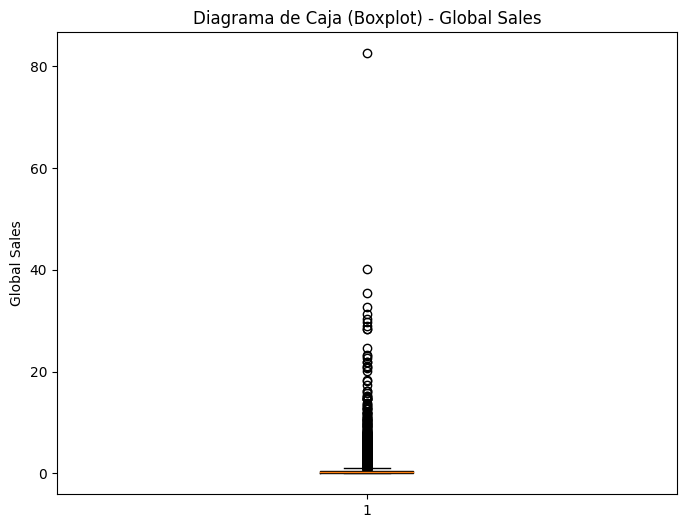

In [18]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = df[(df['Global_Sales'] < lower_bound) | (df['Global_Sales'] > upper_bound)]

print("Valores atípicos en 'Global_Sales':")
print(outliers)

# Visualizar un boxplot para observar los valores atípicos
plt.figure(figsize=(8, 6))
plt.boxplot(df['Global_Sales'])
plt.title('Diagrama de Caja (Boxplot) - Global Sales')
plt.ylabel('Global Sales')
plt.show()



El análisis nos arroja 1887 datos atípicos. Es un valor muy alto.

Algunos juegos pueden tener ventas excepcionalmente altas debido a su popularidad o a ser títulos icónicos, mientras que otros pueden tener ventas muy bajas debido a su recepción negativa o a ser juegos menos conocidos.

Algunos títulos de juegos pueden haber sido "éxitos de culto" o haber sido distribuidos en un período muy corto, lo que podría explicar las variaciones extremas en las ventas.

**Voy a tomar la decisión de realizar un análisis separando estos datos extremos. Trabajaremos con 2 dataframes: 1 con los valores atípicos y 1 con los valores restantes.**

In [19]:
# 'df' es el DataFrame original y 'outliers' contiene los datos atípicos
outliers = df[(df['Global_Sales'] < lower_bound) | (df['Global_Sales'] > upper_bound)]

# Creamos dos DataFrames separados: uno para los datos atípicos y otro para los datos no atípicos
datos_no_atipicos = df[~((df['Global_Sales'] < lower_bound) | (df['Global_Sales'] > upper_bound))]


**DATOS ATÍPICOS**

In [20]:
# Estadísticas descriptivas para los datos atípicos
print("Estadísticas descriptivas para los datos atípicos:")
print(outliers.describe())


Estadísticas descriptivas para los datos atípicos:
       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      1887.000000  1887.000000  1887.000000  1887.000000  1887.000000   
mean       2004.723370     1.427838     0.846778     0.374478     0.271802   
std           7.265733     2.037515     1.271854     0.814885     0.492526   
min        1980.000000     0.000000     0.000000     0.000000     0.000000   
25%        2001.000000     0.620000     0.280000     0.000000     0.080000   
50%        2006.000000     0.970000     0.530000     0.030000     0.160000   
75%        2010.000000     1.580000     1.000000     0.380000     0.290000   
max        2016.000000    41.360000    28.960000    10.220000    10.570000   

       Global_Sales  
count   1887.000000  
mean       2.920874  
std        3.787569  
min        1.090000  
25%        1.360000  
50%        1.840000  
75%        3.000000  
max       82.530000  


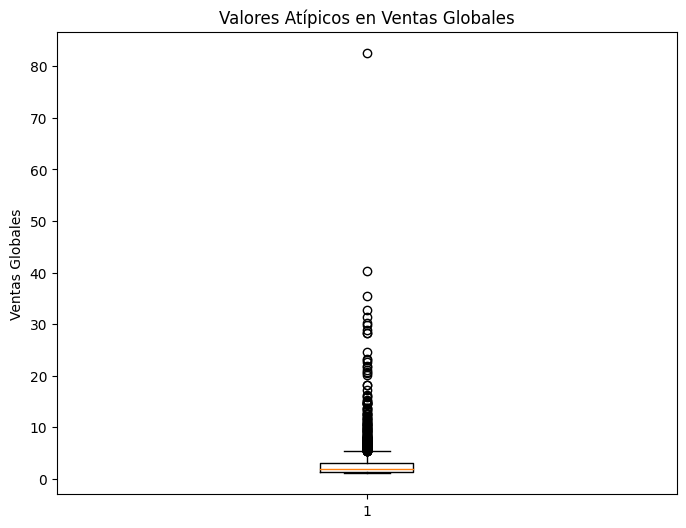

In [21]:
# Gráfico de caja para los datos atípicos en 'Global_Sales'
plt.figure(figsize=(8, 6))
plt.boxplot(outliers['Global_Sales'])
plt.title('Valores Atípicos en Ventas Globales')
plt.ylabel('Ventas Globales')
plt.show()


**DATOS NO ATÍPICOS**

In [22]:
# Estadísticas descriptivas para los datos no atípicos
print("Estadísticas descriptivas para los datos no atípicos:")
print(datos_no_atipicos.describe())


Estadísticas descriptivas para los datos no atípicos:
       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     14773.000000  14773.000000  14773.000000  14773.000000   
mean       2006.723414      0.114872      0.055603      0.039925   
std           5.589436      0.152179      0.095402      0.102230   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.060000      0.020000      0.000000   
75%        2010.000000      0.160000      0.070000      0.030000   
max        2020.000000      1.030000      0.980000      1.050000   

        Other_Sales  Global_Sales  
count  14773.000000  14773.000000  
mean       0.018790      0.229476  
std        0.034838      0.241445  
min        0.000000      0.010000  
25%        0.000000      0.050000  
50%        0.010000      0.140000  
75%        0.020000      0.320000  
max        0.740000      1.080000  


In [23]:
datos_no_atipicos.shape

(14773, 10)

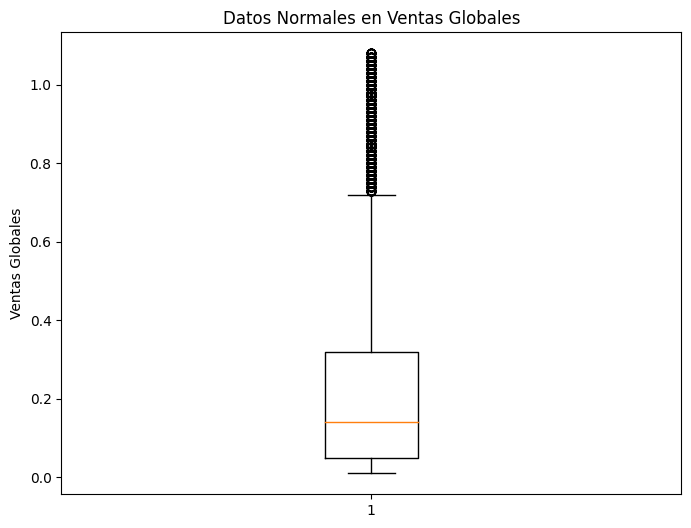

In [24]:
# Gráfico de caja para los datos no atípicos en 'Global_Sales'
plt.figure(figsize=(8, 6))
plt.boxplot(datos_no_atipicos['Global_Sales'])
plt.title('Datos Normales en Ventas Globales')
plt.ylabel('Ventas Globales')
plt.show()


**Observando ambas situaciones, prefiero trabajar con el dataframe sin valores atípicos.Continuaré el análisis sin tener en cuenta dichos valores.**

# Géneros

Gráfico de torta para presentar los distintos **géneros de videojuegos.**

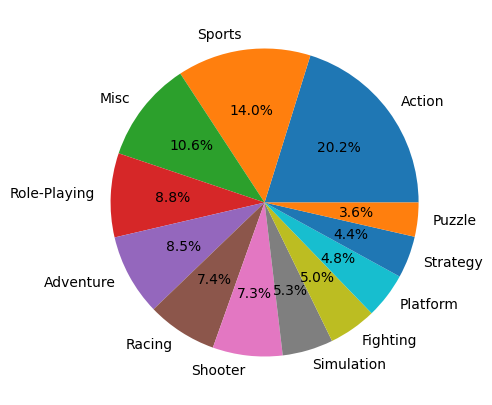

In [25]:
datos_no_atipicos["Genre"].value_counts().plot(kind='pie', figsize=(12,5),autopct='%0.1f%%')
plt.ylabel('')
plt.show()

**Ventas globales de cada género**

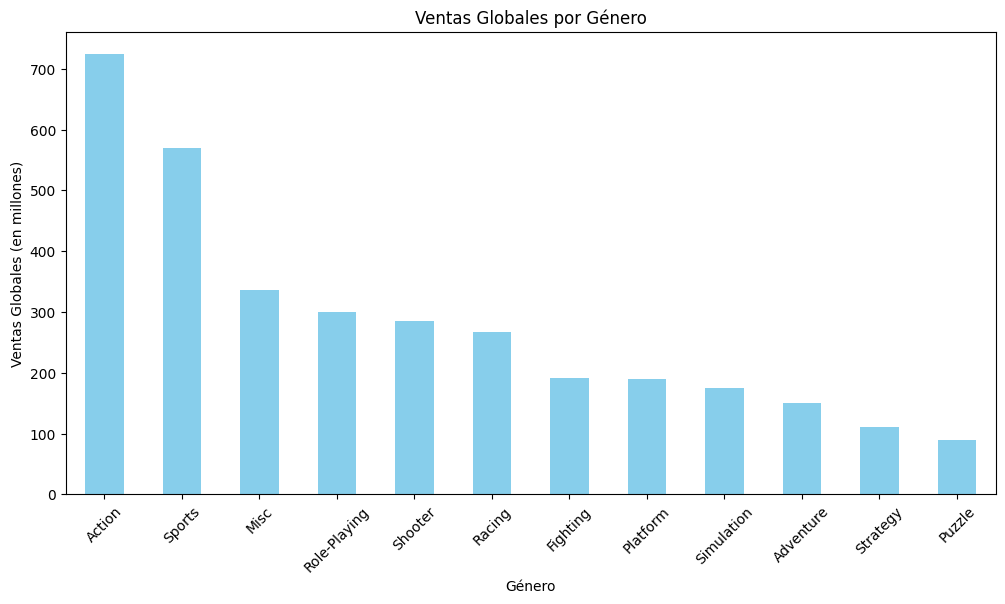

In [26]:
# Agrupar por género y sumar las ventas globales
ventas_por_genero = datos_no_atipicos.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
ventas_por_genero.plot(kind='bar', color='skyblue')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.title('Ventas Globales por Género')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()


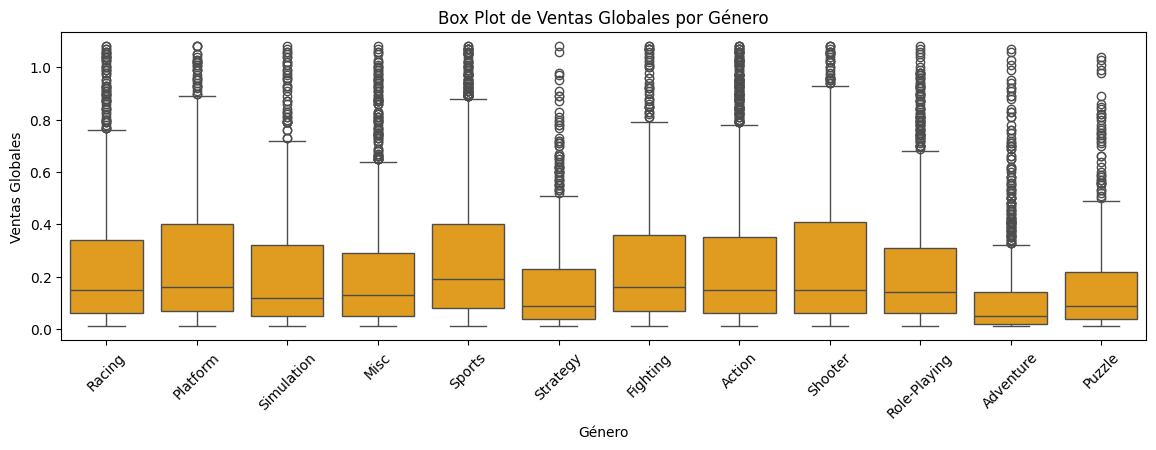

In [27]:
# Crear un box plot de ventas globales por género
plt.figure(figsize=(14, 4))
sns.boxplot(x='Genre', y='Global_Sales', data=datos_no_atipicos, color='#FFA500')

plt.title('Box Plot de Ventas Globales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)

plt.show()

# Año de salida

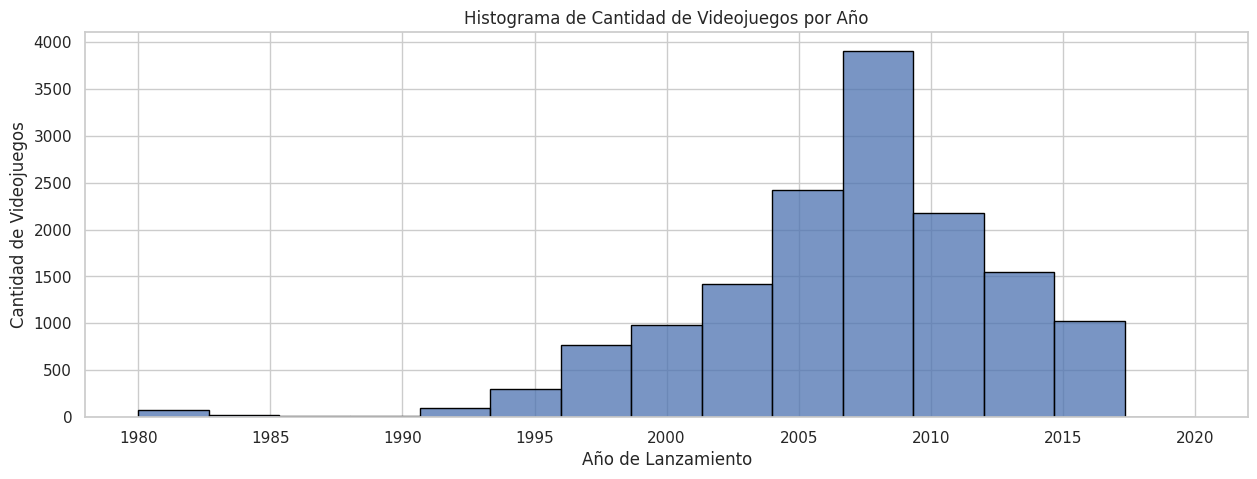

In [28]:
# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear el histograma usando seaborn
plt.figure(figsize=(15, 5))
sns.histplot(data=datos_no_atipicos, x='Year_of_Release', bins=15, kde=False, edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Videojuegos')
plt.title('Histograma de Cantidad de Videojuegos por Año')

# Mostrar el histograma
plt.show()

📌 Podemos ver que entre el año 2005 y 2010 es cuándo más juegos salieron al mercado.

# Plataformas

In [29]:
datos_no_atipicos['Platform'].unique()

array(['PS2', 'DS', 'PSP', 'PC', 'PS3', '2600', 'XOne', 'X360', 'PS',
       'GBA', 'GC', 'Wii', 'SAT', 'N64', 'NES', 'SNES', 'XB', 'PS4', 'GB',
       'WiiU', '3DS', 'PSV', 'DC', 'WS', 'GEN', 'NG', 'SCD', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

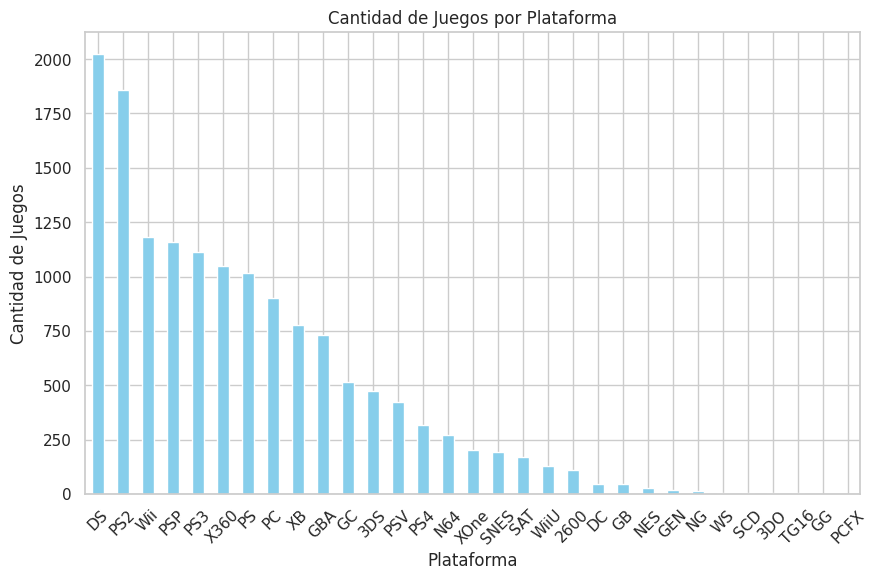

In [30]:
# Contar la cantidad de juegos por plataforma
cantidad_juegos_por_plataforma = datos_no_atipicos['Platform'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
cantidad_juegos_por_plataforma.plot(kind='bar', color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Plataforma')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()


📌 Podemos observar que las 2 consolas/plataformas con más juegos sacados al mercado son **Playstation 2 y Nintendo DS.**

Ahora, vamos a analizar las ventas globales de juegos por plataforma. Utilizaremos un gráfico de barras para visualizar esta información.

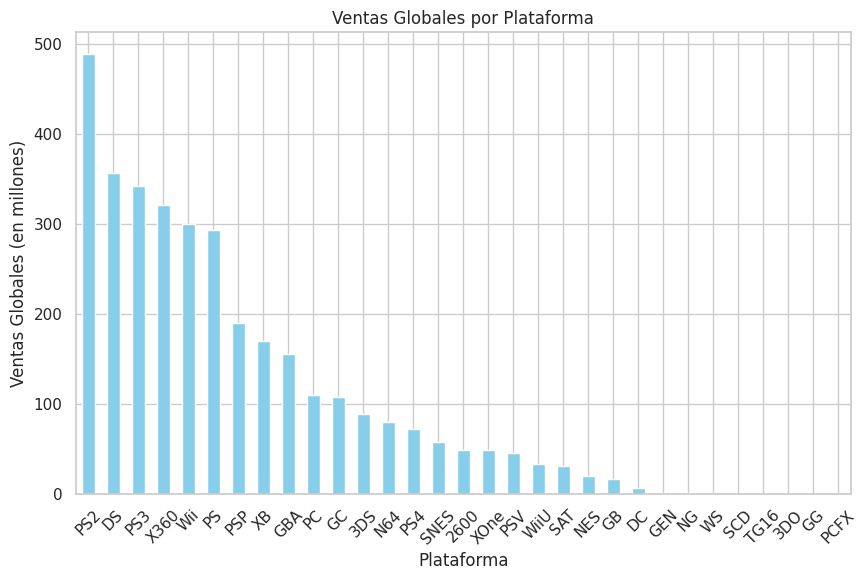

In [31]:
# Agrupar por plataforma y sumar las ventas globales
ventas_por_plataforma = datos_no_atipicos.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
ventas_por_plataforma.plot(kind='bar', color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.title('Ventas Globales por Plataforma')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()


**PlayStation 2, XBOX360, PlayStation 3, Nintendo Wii ,Nintendo DS y PlayStation** sacan una ventaja grande sobre el resto.

In [32]:
# Crear un DataFrame
tabla_ventas_por_plataforma = pd.DataFrame(ventas_por_plataforma).reset_index()

# Imprimir la tabla
print(tabla_ventas_por_plataforma)


   Platform  Global_Sales
0       PS2        489.06
1        DS        356.18
2       PS3        342.41
3      X360        321.12
4       Wii        299.57
5        PS        292.85
6       PSP        190.16
7        XB        169.82
8       GBA        155.82
9        PC        110.31
10       GC        107.70
11      3DS         88.99
12      N64         80.29
13      PS4         72.66
14     SNES         57.74
15     2600         48.79
16     XOne         48.77
17      PSV         45.44
18     WiiU         33.79
19      SAT         30.50
20      NES         19.36
21       GB         16.46
22       DC          7.13
23      GEN          1.57
24       NG          1.44
25       WS          1.42
26      SCD          0.37
27     TG16          0.16
28      3DO          0.10
29       GG          0.04
30     PCFX          0.03


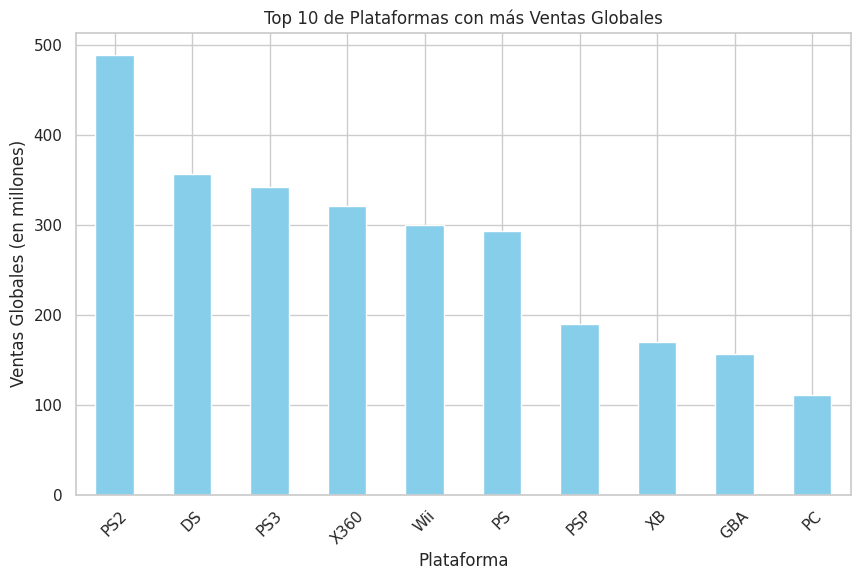

In [33]:
top_10_plataformas = ventas_por_plataforma.head(10)
plt.figure(figsize=(10,6))
top_10_plataformas.plot(kind='bar', color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.title('Top 10 de Plataformas con más Ventas Globales')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()


# Publisher

Para analizar las editoras más exitosas en términos de ventas, vamos a calcular las ventas globales totales para cada editora y luego mostrar las editoras con las mayores ventas.

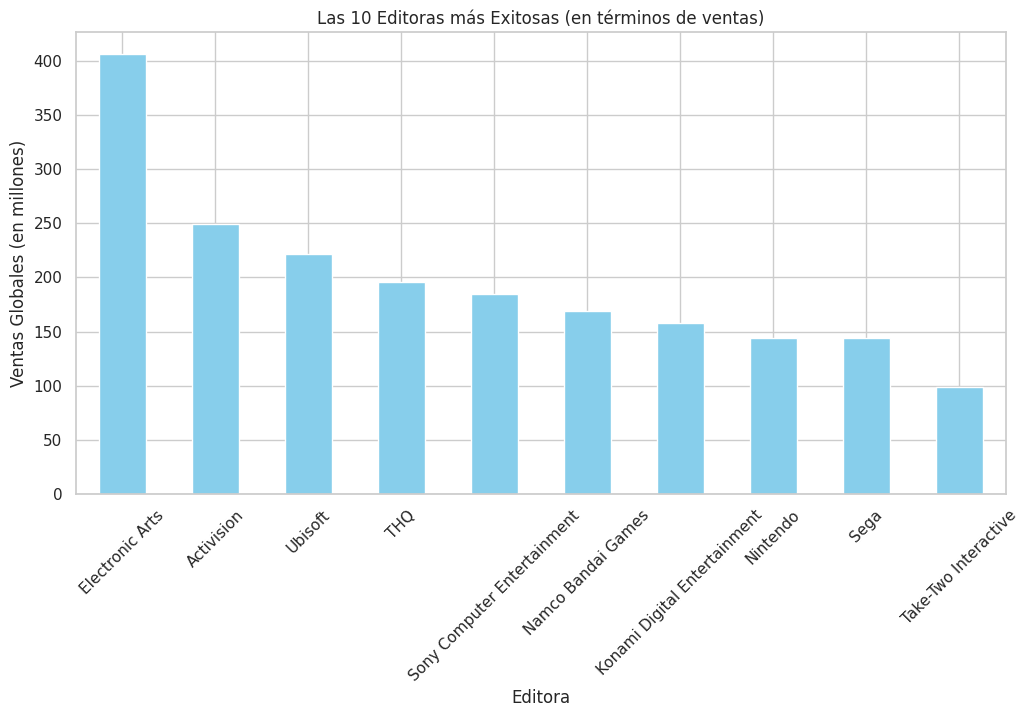

In [34]:
# Agrupar por editora y sumar las ventas globales
ventas_por_editora = datos_no_atipicos.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Tomar las 10 editoras con mayores ventas
top_10_editoras = ventas_por_editora.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12,6))
top_10_editoras.plot(kind='bar', color='skyblue')
plt.xlabel('Editora')
plt.ylabel('Ventas Globales (en millones)')
plt.title('Las 10 Editoras más Exitosas (en términos de ventas)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()


📌 Vemos cómo **EA** es la editora más exitosa en cuanto a ventas totales.

- Ahora veamos qué género es el que más ventas genera para cada editora:

In [35]:
# Encontrar las 10 editoras con mayores ventas
top_10_editoras = datos_no_atipicos.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index

# Filtrar el DataFrame solo para incluir las 10 editoras principales
df_top_10_editoras = datos_no_atipicos[datos_no_atipicos['Publisher'].isin(top_10_editoras)]

# Agrupar por editora y género, y sumar las ventas globales
ventas_por_editora_y_genero = df_top_10_editoras.groupby(['Publisher', 'Genre'])['Global_Sales'].sum()

# Encontrar el género más rentable para cada editora
genero_mas_rentable_por_editora = ventas_por_editora_y_genero.groupby('Publisher').idxmax().reset_index()

# Renombrar columnas
genero_mas_rentable_por_editora.columns = ['Publisher', 'Genre']

# Mostrar el resultado
print(genero_mas_rentable_por_editora)


                      Publisher                                   Genre
0                    Activision                    (Activision, Action)
1               Electronic Arts               (Electronic Arts, Sports)
2  Konami Digital Entertainment  (Konami Digital Entertainment, Sports)
3            Namco Bandai Games          (Namco Bandai Games, Fighting)
4                      Nintendo                (Nintendo, Role-Playing)
5                          Sega                          (Sega, Sports)
6   Sony Computer Entertainment   (Sony Computer Entertainment, Sports)
7                           THQ                           (THQ, Action)
8          Take-Two Interactive          (Take-Two Interactive, Sports)
9                       Ubisoft                       (Ubisoft, Action)


# *Inicio el Análisis Bivariado:* 📊📊

Primer paso, correlación entre las ventas en cada sector y las ventas globales.



In [36]:
# Calcular las correlaciones de cada columna con 'Global_Sales'
correlations = datos_no_atipicos.corr()['Global_Sales'].sort_values(ascending=False)

# Mostrar las correlaciones en una tabla
print(correlations)


Global_Sales       1.000000
NA_Sales           0.805826
EU_Sales           0.713176
Other_Sales        0.671051
JP_Sales           0.271102
Year_of_Release   -0.122014
Name: Global_Sales, dtype: float64


<ipython-input-36-7fc29a930e56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = datos_no_atipicos.corr()['Global_Sales'].sort_values(ascending=False)


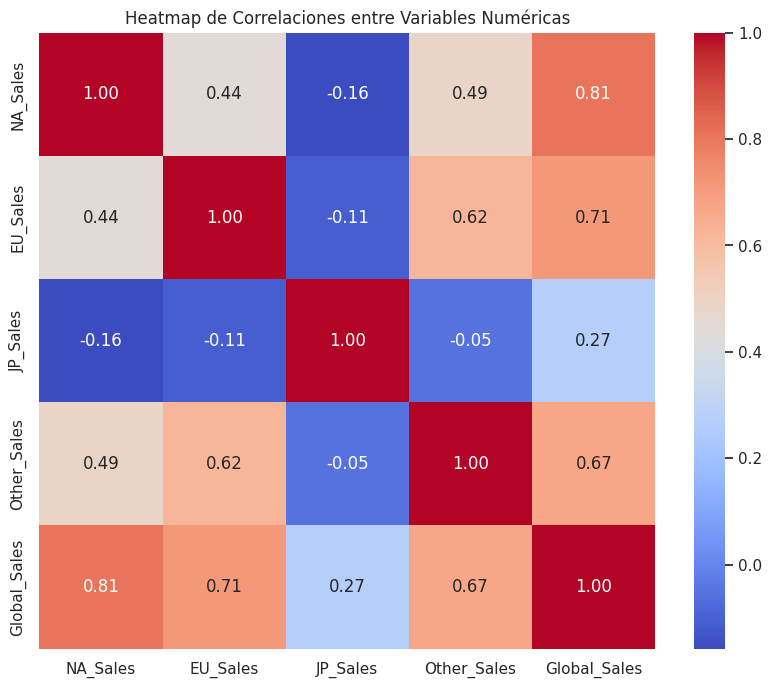

In [37]:
# Seleccionar solo las variables numéricas para el heatmap
datos_numericos = datos_no_atipicos[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Calcular la matriz de correlación
correlaciones = datos_numericos.corr()

# Crear un heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap de Correlaciones entre Variables Numéricas')
plt.show()


**VENTAS EN NORTEAMÉRICA vs VENTAS GLOBALES:**

In [38]:
# Calculamos la correlación entre 'NA_Sales' y 'Global_Sales'
correlation = datos_no_atipicos['NA_Sales'].corr(datos_no_atipicos['Global_Sales'])
print(f"La correlación entre 'NA_Sales' y 'Global_Sales' es: {correlation}")


La correlación entre 'NA_Sales' y 'Global_Sales' es: 0.8058263595577889


**Una correlación de 0.806** sugiere que hay una asociación considerable entre las ventas en América del Norte y las ventas globales de videojuegos en tu conjunto de datos, lo que indica que, en general, los juegos que tienen altas ventas en América del Norte tienden a tener también altas ventas globales, y viceversa.

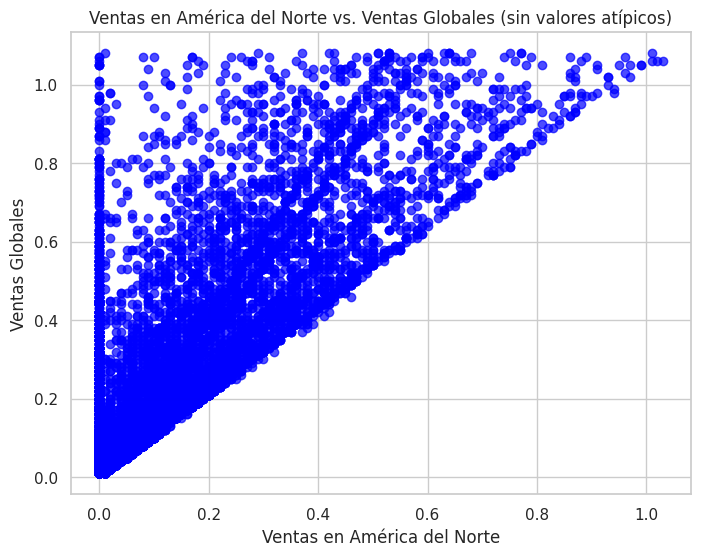

In [39]:
# Gráfico de dispersión para 'NA_Sales' vs 'Global_Sales'
plt.figure(figsize=(8, 6))
plt.scatter(datos_no_atipicos['NA_Sales'], datos_no_atipicos['Global_Sales'], alpha=0.7, color='blue')
plt.title('Ventas en América del Norte vs. Ventas Globales (sin valores atípicos)')
plt.xlabel('Ventas en América del Norte')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.show()


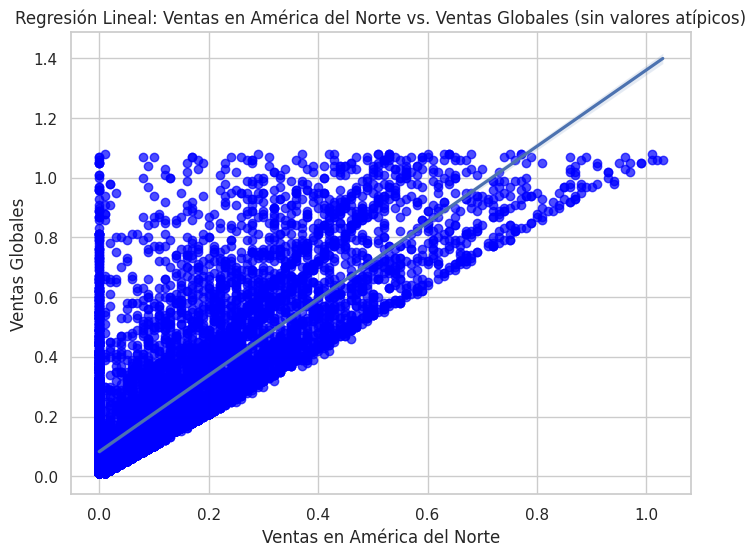

In [40]:
# Gráfico de regresión lineal con 'NA_Sales' como variable independiente y 'Global_Sales' como variable dependiente
plt.figure(figsize=(8, 6))
sns.regplot(x='NA_Sales', y='Global_Sales', data=datos_no_atipicos, scatter_kws={'alpha':0.7, 'color':'blue'})
plt.title('Regresión Lineal: Ventas en América del Norte vs. Ventas Globales (sin valores atípicos)')
plt.xlabel('Ventas en América del Norte')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.show()


**VENTAS EN JAPÓN vs VENTAS GLOBALES:**

In [41]:
# Calculamos la correlación entre 'JP_Sales' y 'Global_Sales'
correlation_jp = datos_no_atipicos['JP_Sales'].corr(datos_no_atipicos['Global_Sales'])
print(f"La correlación entre 'JP_Sales' y 'Global_Sales' es: {correlation_jp}")


La correlación entre 'JP_Sales' y 'Global_Sales' es: 0.2711021422573226


**Una correlación de 0.271** sugiere una asociación más modesta entre las ventas en Japón y las ventas globales de videojuegos en tu conjunto de datos sin valores atípicos. Esto podría significar que, en general, las ventas en Japón tienen una relación más débil con las ventas globales en comparación con las ventas en América del Norte, al menos en el conjunto de datos actual.

Este valor de correlación más bajo sugiere que la relación entre las ventas en Japón y las ventas globales es menos fuerte en comparación con las ventas en América del Norte y las ventas globales. Es importante considerar estas relaciones al realizar análisis posteriores o al intentar comprender los factores que influyen en las ventas globales de videojuegos.

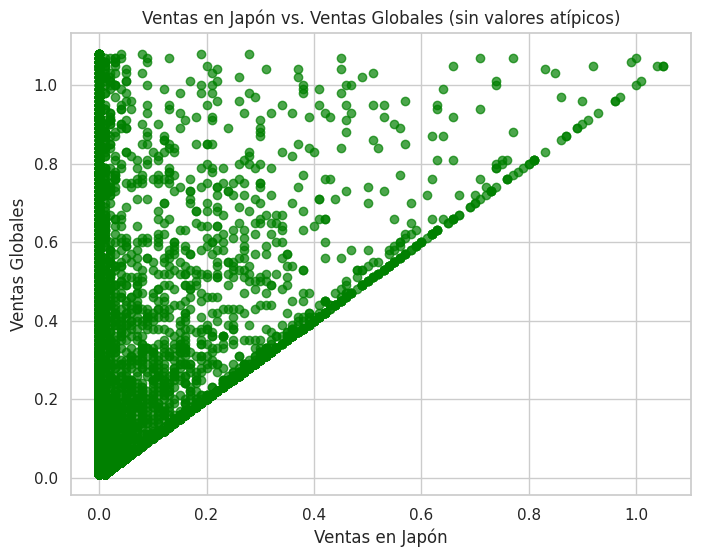

In [42]:
# Gráfico de dispersión para 'JP_Sales' vs 'Global_Sales'
plt.figure(figsize=(8, 6))
plt.scatter(datos_no_atipicos['JP_Sales'], datos_no_atipicos['Global_Sales'], alpha=0.7, color='green')
plt.title('Ventas en Japón vs. Ventas Globales (sin valores atípicos)')
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.show()


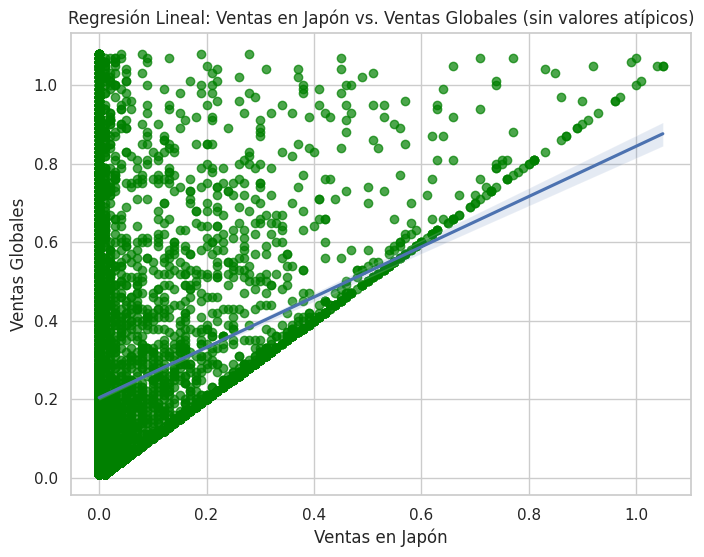

In [43]:
# Gráfico de regresión lineal con 'JP_Sales' como variable independiente y 'Global_Sales' como variable dependiente
plt.figure(figsize=(8, 6))
sns.regplot(x='JP_Sales', y='Global_Sales', data=datos_no_atipicos, scatter_kws={'alpha':0.7, 'color':'green'})
plt.title('Regresión Lineal: Ventas en Japón vs. Ventas Globales (sin valores atípicos)')
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.show()


AÑO DE LANZAMIENTO vs VENTAS GLOBALES:

In [44]:
# Calcular la correlación entre 'Year_of_Release' y 'Global_Sales'
correlation_year = datos_no_atipicos['Year_of_Release'].corr(datos_no_atipicos['Global_Sales'])
print(f"La correlación entre 'Year_of_Release' y 'Global_Sales' es: {correlation_year}")


La correlación entre 'Year_of_Release' y 'Global_Sales' es: -0.12201409023762332


Esta correlación cercana a cero indica una correlación muy débil y casi nula entre el año de lanzamiento de un videojuego y sus ventas globales en el conjunto de datos analizado. La relación negativa sugiere que, en general, no hay una fuerte asociación entre el año de lanzamiento y las ventas globales; es decir, el año en que un juego fue lanzado no tiene una influencia significativa en sus ventas globales.

Esto puede deberse a que otros factores, como la calidad del juego, el género, la plataforma, el marketing o tendencias culturales, tienen un impacto más significativo en las ventas globales que el año específico de lanzamiento. Es importante considerar estos otros factores al analizar cómo influyen en las ventas globales de videojuegos.

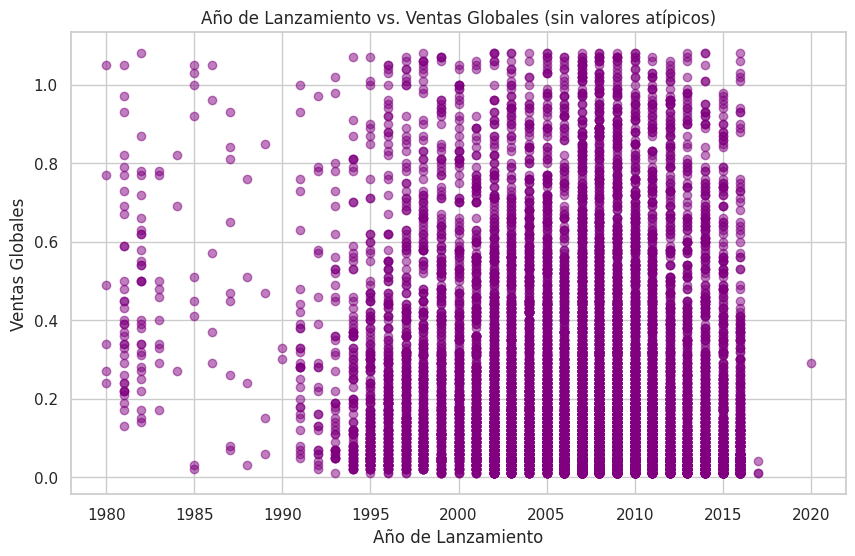

In [45]:
# Gráfico de dispersión para 'Year_of_Release' vs 'Global_Sales'
plt.figure(figsize=(10, 6))
plt.scatter(datos_no_atipicos['Year_of_Release'], datos_no_atipicos['Global_Sales'], alpha=0.5, color='purple')
plt.title('Año de Lanzamiento vs. Ventas Globales (sin valores atípicos)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.show()


En este caso no usamos el gráfico de regresión lineal por la naturaleza discreta (no lineal) de los datos de esta variable.

# Comparación entre géneros: 🎮

In [46]:
# Calculamos el total de ventas globales por género
ventas_por_genero = datos_no_atipicos.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(ventas_por_genero)


Genre
Action          723.76
Sports          569.31
Misc            336.42
Role-Playing    299.53
Shooter         286.06
Racing          267.63
Fighting        191.29
Platform        190.54
Simulation      174.96
Adventure       150.23
Strategy        110.72
Puzzle           89.60
Name: Global_Sales, dtype: float64


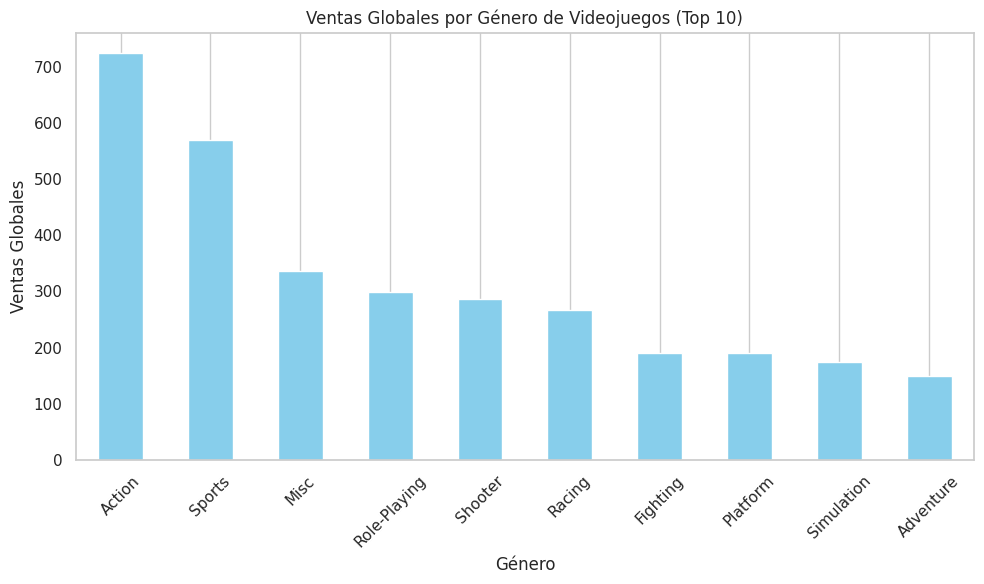

In [47]:
# Graficamos las ventas globales por género (top 10 géneros)
top_10_ventas_por_genero = ventas_por_genero.head(10)  # Tomar los 10 géneros con mayores ventas
plt.figure(figsize=(10, 6))
top_10_ventas_por_genero.plot(kind='bar', color='skyblue')
plt.title('Ventas Globales por Género de Videojuegos (Top 10)')
plt.xlabel('Género')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Evolución de las ventas a lo largo del tiempo: ⌛

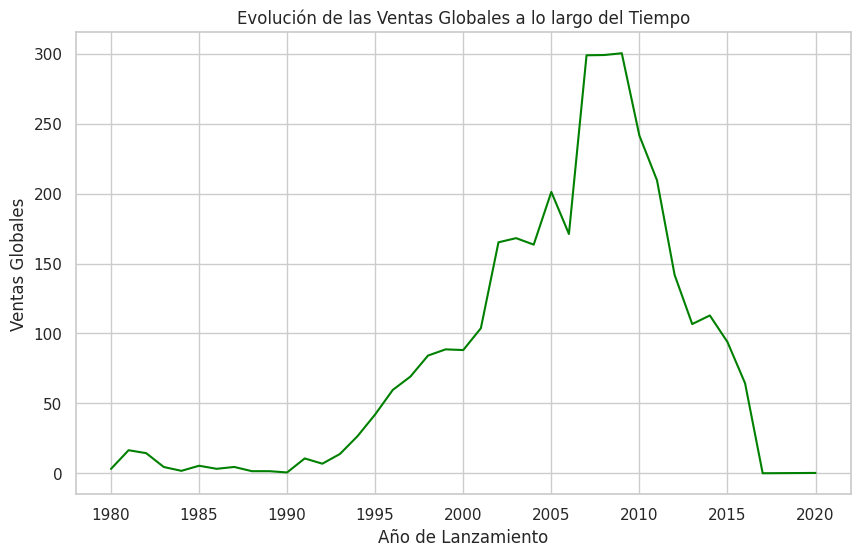

In [48]:
# Agrupamos por año de lanzamiento y calculamos las ventas globales totales por año
ventas_por_año = datos_no_atipicos.groupby('Year_of_Release')['Global_Sales'].sum()
# Graficamos la evolución de las ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
ventas_por_año.plot(kind='line', color='green')
plt.title('Evolución de las Ventas Globales a lo largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.show()


Recodemos que el dato que se tiene es el año de lanzamiento del juego.
Por lo que la información que nos arroja este gráfico son los años cuando salieron los juegos con más ventas.
No así los años con mas ventas globales.

# Respuestas a las hipótesis planteadas inicialmente:

Continuamos trabajando con nuestra database, la que no tiene en cuenta los datos atípicos.

Ahora vamos a crear una columna clasificando las ventas totales.

Analizamos la normalidad de la variable "Global_Sales" :

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Estadístico de prueba: 0.80989009141922
Valor p: 0.0
Los datos no parecen provenir de una distribución normal (se rechaza H0)


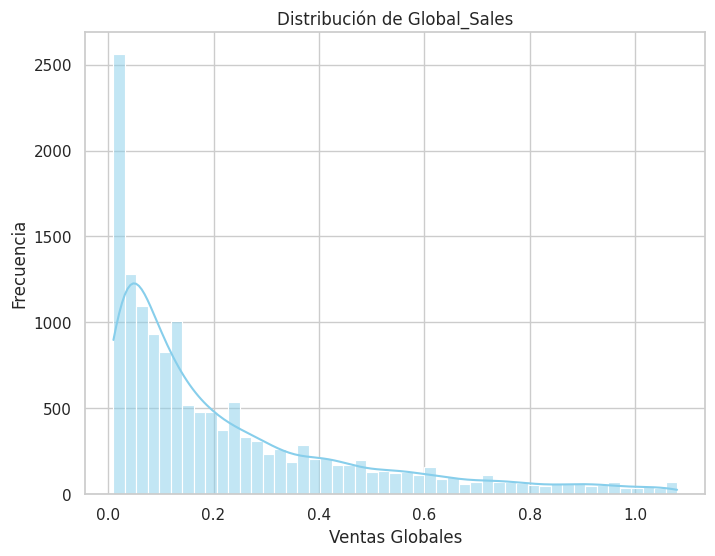

In [49]:
from scipy.stats import shapiro

# Suponiendo que 'Global_Sales' es la columna que representa las ventas totales
sales_data = datos_no_atipicos['Global_Sales']

# Prueba de Shapiro-Wilk para verificar la normalidad
stat, p = shapiro(sales_data)

# Imprimir el resultado de la prueba
print("Estadístico de prueba:", stat)
print("Valor p:", p)

alpha = 0.05
if p > alpha:
    print("Los datos parecen provenir de una distribución normal (no se rechaza H0)")
else:
    print("Los datos no parecen provenir de una distribución normal (se rechaza H0)")

# Visualización de la distribución de 'Global_Sales'
plt.figure(figsize=(8, 6))
sns.histplot(sales_data, kde=True, color='skyblue')
plt.title('Distribución de Global_Sales')
plt.xlabel('Ventas Globales')
plt.ylabel('Frecuencia')
plt.show()


In [50]:
datos_no_atipicos.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000
mean,2006.723414,0.114872,0.055603,0.039925,0.018790,0.229476
std,5.589436,0.152179,0.095402,0.102230,0.034838,0.241445
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,2007.000000,0.060000,0.020000,0.000000,0.010000,0.140000
75%,2010.000000,0.160000,0.070000,0.030000,0.020000,0.320000
max,2020.000000,1.030000,0.980000,1.050000,0.740000,1.080000


In [51]:
#Nuestro dataframe se llama: "datos_no_atipicos"
# Definir los límites de los bins basados en los cuartiles
bins = [0.01, 0.05, 0.14, 0.32, 1.08]  # Usando los límites de los cuartiles
labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto',"Muy Alto"]  # Etiquetas para cada bin

# Crear una nueva columna 'Sales_Bins' con valores iniciales
datos_no_atipicos['Sales_Bins'] = ''

# Aplicar el binning utilizando .loc
datos_no_atipicos.loc[datos_no_atipicos['Global_Sales'] <= bins[0], 'Sales_Bins'] = labels[0]
datos_no_atipicos.loc[(datos_no_atipicos['Global_Sales'] > bins[0]) & (datos_no_atipicos['Global_Sales'] <= bins[1]), 'Sales_Bins'] = labels[1]
datos_no_atipicos.loc[(datos_no_atipicos['Global_Sales'] > bins[1]) & (datos_no_atipicos['Global_Sales'] <= bins[2]), 'Sales_Bins'] = labels[2]
datos_no_atipicos.loc[(datos_no_atipicos['Global_Sales'] > bins[2]) & (datos_no_atipicos['Global_Sales'] <= bins[3]), 'Sales_Bins'] = labels[3]
datos_no_atipicos.loc[(datos_no_atipicos['Global_Sales'] > bins[3]) & (datos_no_atipicos['Global_Sales'] <= bins[4]), 'Sales_Bins'] = labels[4]
# Mostrar el DataFrame con la nueva columna de bins
print(datos_no_atipicos)


                                                    Name Platform  \
1892                                 NASCAR Thunder 2004      PS2   
1893   SpongeBob SquarePants: Revenge of the Flying D...      PS2   
1894                                Imagine: Babysitters       DS   
1895                      Namco Museum Battle Collection      PSP   
1896                               Fisherman's Bass Club      PS2   
...                                                  ...      ...   
16714                      Samurai Warriors: Sanada Maru      PS3   
16715                                   LMA Manager 2007     X360   
16716                            Haitaka no Psychedelica      PSV   
16717                                   Spirits & Spells      GBA   
16718                                Winning Post 8 2016      PSV   

       Year_of_Release       Genre                    Publisher  NA_Sales  \
1892            2003.0      Racing              Electronic Arts      0.53   
1893            2

<ipython-input-51-42cb29839d0f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_no_atipicos['Sales_Bins'] = ''


Contamos cuántos juegos entran en cada categoría:

In [52]:
# Contar cuántos juegos entran en cada categoría
Juegosporcategoria = datos_no_atipicos['Sales_Bins'].value_counts()

# Mostrar el conteo de juegos por categoría
print(Juegosporcategoria)


Medio       3866
Muy Alto    3648
Alto        3420
Bajo        3208
Muy Bajo     631
Name: Sales_Bins, dtype: int64


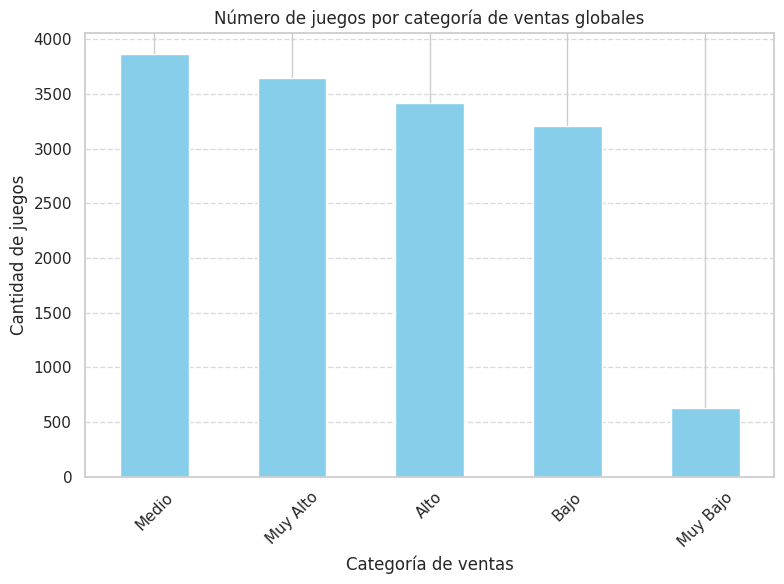

In [53]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
Juegosporcategoria.plot(kind='bar', color='skyblue')
plt.title('Número de juegos por categoría de ventas globales')
plt.xlabel('Categoría de ventas')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Luego de realizar la limpieza de outliers podemos ver que la distribución por categorías **es mucho más balanceada.**

<ipython-input-54-471427e6778c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_muy_alto.head(10), y=genre_counts_muy_alto.head(10).index, palette='viridis')


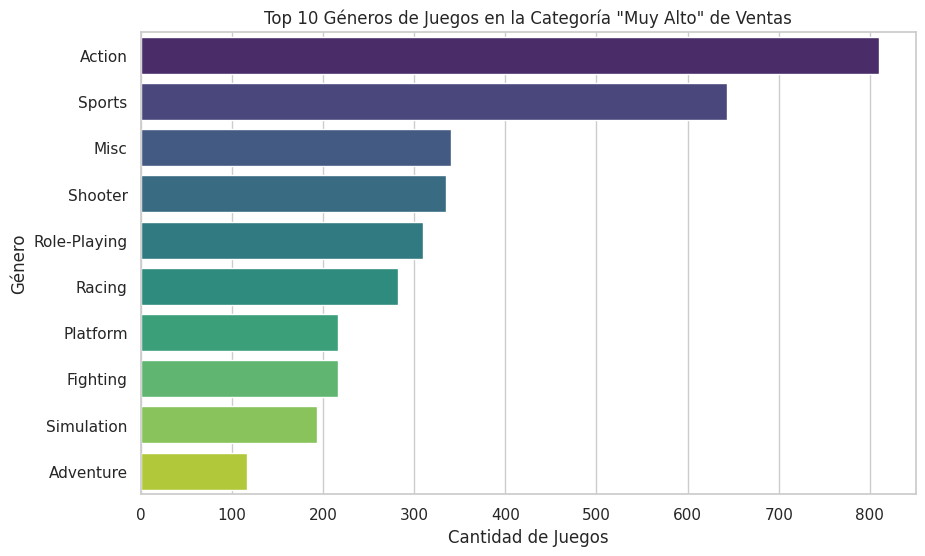

In [54]:
# Filtramos los juegos que pertenecen a la categoría 'Muy Alto' en 'Sales_Bins'
muy_alto_games = datos_no_atipicos[datos_no_atipicos['Sales_Bins'] == 'Muy Alto']

# Obtenenemos la distribución de géneros dentro de la categoría 'Muy Alto'
genre_counts_muy_alto = muy_alto_games['Genre'].value_counts()

# Graficamos los géneros más comunes en la categoría 'Muy Alto'
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts_muy_alto.head(10), y=genre_counts_muy_alto.head(10).index, palette='viridis')
plt.title('Top 10 Géneros de Juegos en la Categoría "Muy Alto" de Ventas')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.show()


Si bien el resultado es muy similar a los analizado previamente, podemos determinar claramente que los **géneros más vendidos son "ACTION y SPORTS".**

Si analizábamos esto solamente con las ventas totales, podría ser que algún juego en específico mueva mucho la balanza.

# Voy a exportar el dataframe "datos_no_atipicos" que estoy utilizando en los últimos análisis, para ya continuar definitivamente con ese.

In [55]:
# Guardar el DataFrame en un archivo CSV
datos_no_atipicos.to_csv('VideoGamesFinal.csv', index=False)

# **🧮 FEATURE ENGINEER 🧮**

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Dataset ⏳</b></div>

In [63]:
df = pd.read_csv('/content/gdrive/MyDrive/Coderhouse Maestu/Data Science /VideoGamesFinal.csv')

In [64]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Bins
0,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.0,0.14,1.08,Muy Alto
1,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002.0,Platform,THQ,0.53,0.41,0.0,0.14,1.08,Muy Alto
2,Imagine: Babysitters,DS,2008.0,Simulation,Ubisoft,0.63,0.35,0.0,0.10,1.08,Muy Alto
3,Namco Museum Battle Collection,PSP,2005.0,Misc,Sony Computer Entertainment,0.75,0.18,0.0,0.16,1.08,Muy Alto
4,Fisherman's Bass Club,PS2,2002.0,Sports,Agetec,0.53,0.41,0.0,0.14,1.08,Muy Alto


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14773 entries, 0 to 14772
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14773 non-null  object 
 1   Platform         14773 non-null  object 
 2   Year_of_Release  14773 non-null  float64
 3   Genre            14773 non-null  object 
 4   Publisher        14773 non-null  object 
 5   NA_Sales         14773 non-null  float64
 6   EU_Sales         14773 non-null  float64
 7   JP_Sales         14773 non-null  float64
 8   Other_Sales      14773 non-null  float64
 9   Global_Sales     14773 non-null  float64
 10  Sales_Bins       14773 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


# 🗄️ Procesos de Encoding 🗄️

-Realizamos **label encoding** a nuestra columna **"Sales_Bins"**.

In [66]:
from sklearn.preprocessing import LabelEncoder

# Instanciar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a la columna 'Sales_Bins'
df['Sales_Bins_Encoded'] = label_encoder.fit_transform(df['Sales_Bins'])

# Mostrar las primeras filas del DataFrame con la columna codificada
print(df[['Sales_Bins', 'Sales_Bins_Encoded']].head())


  Sales_Bins  Sales_Bins_Encoded
0   Muy Alto                   3
1   Muy Alto                   3
2   Muy Alto                   3
3   Muy Alto                   3
4   Muy Alto                   3


-Ahora, trabajamos con la columna **"Genre"**. Veamos valores únicos y la frecuencia para ver qué método utilizar:

In [67]:
# Mostrar los valores únicos y contar su frecuencia en la columna 'Genre'
genre_counts = df['Genre'].value_counts()

# Mostrar la cantidad de valores únicos y su frecuencia
print("Cantidad de valores únicos en 'Genre':", len(genre_counts))
print("\nFrecuencia de cada categoría en 'Genre':")
print(genre_counts)


Cantidad de valores únicos en 'Genre': 12

Frecuencia de cada categoría en 'Genre':
Action          2983
Sports          2072
Misc            1567
Role-Playing    1303
Adventure       1262
Racing          1088
Shooter         1083
Simulation       788
Fighting         740
Platform         708
Strategy         651
Puzzle           528
Name: Genre, dtype: int64


-Al haber demasiados valores únicos, más de 10, vamos a aplicar **"One-Hot encoding"**

In [68]:
# Aplicar One-Hot Encoding a la columna 'Genre'
one_hot_encoded_genre = pd.get_dummies(df['Genre'], prefix='Genre')

# Concatenar al DataFrame original
df = pd.concat([df, one_hot_encoded_genre], axis=1)

# Mostrar las primeras filas del DataFrame con las columnas codificadas
print(df.head())


                                                Name Platform  \
0                                NASCAR Thunder 2004      PS2   
1  SpongeBob SquarePants: Revenge of the Flying D...      PS2   
2                               Imagine: Babysitters       DS   
3                     Namco Museum Battle Collection      PSP   
4                              Fisherman's Bass Club      PS2   

   Year_of_Release       Genre                    Publisher  NA_Sales  \
0           2003.0      Racing              Electronic Arts      0.53   
1           2002.0    Platform                          THQ      0.53   
2           2008.0  Simulation                      Ubisoft      0.63   
3           2005.0        Misc  Sony Computer Entertainment      0.75   
4           2002.0      Sports                       Agetec      0.53   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  ... Genre_Fighting  \
0      0.41       0.0         0.14          1.08  ...              0   
1      0.41       0.0     

-Seguimos con nuestra variable **"Platform"**

In [69]:
# Mostrar los valores únicos y contar su frecuencia en la columna 'Platform'
platform_counts = df['Platform'].value_counts()

# Mostrar la cantidad de valores únicos y su frecuencia
print("Cantidad de valores únicos en 'Platform':", len(platform_counts))
print("\nFrecuencia de cada categoría en 'Platform':")
print(platform_counts)


Cantidad de valores únicos en 'Platform': 31

Frecuencia de cada categoría en 'Platform':
DS      2024
PS2     1857
Wii     1180
PSP     1159
PS3     1111
X360    1050
PS      1014
PC       903
XB       775
GBA      731
GC       513
3DS      472
PSV      424
PS4      317
N64      272
XOne     200
SNES     194
SAT      171
WiiU     130
2600     110
DC        46
GB        45
NES       29
GEN       16
NG        12
WS         6
SCD        5
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


-Debido a la cantidad de valores únicos, debemos utilizar también **OneHot Encoding**.

In [70]:
# Aplicar One-Hot Encoding a la columna 'Platform'
one_hot_encoded_platform = pd.get_dummies(df['Platform'], prefix='Platform')

# Concatenar al DataFrame original
df = pd.concat([df, one_hot_encoded_platform], axis=1)

# Mostrar las primeras filas del DataFrame con las columnas codificadas
print(df.head())


                                                Name Platform  \
0                                NASCAR Thunder 2004      PS2   
1  SpongeBob SquarePants: Revenge of the Flying D...      PS2   
2                               Imagine: Babysitters       DS   
3                     Namco Museum Battle Collection      PSP   
4                              Fisherman's Bass Club      PS2   

   Year_of_Release       Genre                    Publisher  NA_Sales  \
0           2003.0      Racing              Electronic Arts      0.53   
1           2002.0    Platform                          THQ      0.53   
2           2008.0  Simulation                      Ubisoft      0.63   
3           2005.0        Misc  Sony Computer Entertainment      0.75   
4           2002.0      Sports                       Agetec      0.53   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  ... Platform_SAT  \
0      0.41       0.0         0.14          1.08  ...            0   
1      0.41       0.0         

-Por último analizamos la variable **"Publisher"**

In [71]:
# Mostrar los valores únicos y contar su frecuencia en la columna 'Publisher'
publisher_counts = df['Publisher'].value_counts()

# Mostrar la cantidad de valores únicos y su frecuencia
print("Cantidad de valores únicos en 'Publisher':", len(publisher_counts))
print("\nFrecuencia de cada editor en 'Publisher':")
print(publisher_counts)


Cantidad de valores únicos en 'Publisher': 573

Frecuencia de cada editor en 'Publisher':
Electronic Arts                 1043
Namco Bandai Games               893
Activision                       834
Ubisoft                          834
Konami Digital Entertainment     776
                                ... 
Max Five                           1
Merscom LLC                        1
On Demand                          1
Pony Canyon                        1
Red Flagship                       1
Name: Publisher, Length: 573, dtype: int64


-Vamos a limitar el análisis a los **15 editores más frecuentes** y agrupar los demás en una categoría llamada **"Otros"**.

In [72]:
# Calcular la frecuencia de cada editor en 'Publisher'
publisher_counts = df['Publisher'].value_counts()

# Obtener los 15 editores más frecuentes
top_15_publishers = publisher_counts.head(15).index.tolist()

# Crear una nueva columna 'Publisher_Top15' y asignar 'Otros' a los editores no incluidos en los top 15
df['Publisher_Top15'] = df['Publisher'].apply(lambda x: x if x in top_15_publishers else 'Otros')

# Eliminar la columna 'Publisher' original
df = df.drop('Publisher', axis=1)

# Mostrar las primeras filas del DataFrame con la nueva columna 'Publisher_Top15'
print(df[['Publisher_Top15']].head(10))


               Publisher_Top15
0              Electronic Arts
1                          THQ
2                      Ubisoft
3  Sony Computer Entertainment
4                        Otros
5                         Sega
6                         Sega
7              Electronic Arts
8                        Otros
9                        Atari


In [73]:
print(df[['Publisher_Top15']].head(10))

               Publisher_Top15
0              Electronic Arts
1                          THQ
2                      Ubisoft
3  Sony Computer Entertainment
4                        Otros
5                         Sega
6                         Sega
7              Electronic Arts
8                        Otros
9                        Atari


In [74]:
# Aplicar One-Hot Encoding a la columna 'Publisher_Top15'
one_hot_encoded_publisher = pd.get_dummies(df['Publisher_Top15'], prefix='Publisher')

# Concatenar al DataFrame original
df = pd.concat([df, one_hot_encoded_publisher], axis=1)

# Mostrar las primeras filas del DataFrame con las columnas codificadas
print(df.head())


                                                Name Platform  \
0                                NASCAR Thunder 2004      PS2   
1  SpongeBob SquarePants: Revenge of the Flying D...      PS2   
2                               Imagine: Babysitters       DS   
3                     Namco Museum Battle Collection      PSP   
4                              Fisherman's Bass Club      PS2   

   Year_of_Release       Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0           2003.0      Racing      0.53      0.41       0.0         0.14   
1           2002.0    Platform      0.53      0.41       0.0         0.14   
2           2008.0  Simulation      0.63      0.35       0.0         0.10   
3           2005.0        Misc      0.75      0.18       0.0         0.16   
4           2002.0      Sports      0.53      0.41       0.0         0.14   

   Global_Sales Sales_Bins  ...  Publisher_Nintendo  Publisher_Otros  \
0          1.08   Muy Alto  ...                   0                0   
1 

-Bueno, ahora sí tenemos nuestra database lista para encarar los modelos.

#🤓 Entrenamiento de Modelos 🤓

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14773 entries, 0 to 14772
Data columns (total 71 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Name                                    14773 non-null  object 
 1   Platform                                14773 non-null  object 
 2   Year_of_Release                         14773 non-null  float64
 3   Genre                                   14773 non-null  object 
 4   NA_Sales                                14773 non-null  float64
 5   EU_Sales                                14773 non-null  float64
 6   JP_Sales                                14773 non-null  float64
 7   Other_Sales                             14773 non-null  float64
 8   Global_Sales                            14773 non-null  float64
 9   Sales_Bins                              14773 non-null  object 
 10  Sales_Bins_Encoded                      14773 non-null  in

In [76]:
# Obtener las columnas que son de tipo 'object' (string)
string_columns = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar las columnas que son de tipo string
print(string_columns)


['Name', 'Platform', 'Genre', 'Sales_Bins', 'Publisher_Top15']


Seleccionamos las columnas que no son de tipo 'object' y creamos un nuevo DataFrame llamado **df_numeric** que contendrá solo las columnas numéricas. **Este nuevo DataFrame es el que utilizaremos para entrenar los modelos de aprendizaje automático.**



In [77]:
# Seleccionamos solo las columnas numéricas
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
df_numeric = df[numeric_columns]

# Mostramos las primeras filas del nuevo DataFrame
print(df_numeric.head())


   Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0           2003.0      0.53      0.41       0.0         0.14          1.08   
1           2002.0      0.53      0.41       0.0         0.14          1.08   
2           2008.0      0.63      0.35       0.0         0.10          1.08   
3           2005.0      0.75      0.18       0.0         0.16          1.08   
4           2002.0      0.53      0.41       0.0         0.14          1.08   

   Sales_Bins_Encoded  Genre_Action  Genre_Adventure  Genre_Fighting  ...  \
0                   3             0                0               0  ...   
1                   3             0                0               0  ...   
2                   3             0                0               0  ...   
3                   3             0                0               0  ...   
4                   3             0                0               0  ...   

   Publisher_Nintendo  Publisher_Otros  Publisher_Sega  \
0   

# **1- Modelo de clasificación: Random Forest 🌲🌲🌲**



In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar las características (X) y la variable objetivo (y)
X = df_numeric.drop('Sales_Bins_Encoded', axis=1)  # Características
y = df_numeric['Sales_Bins_Encoded']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Random Forest: {accuracy:.2f}')


Precisión del modelo Random Forest: 1.00


-Me da un **sobreajuste total**. Vamos a implementar ajuste de los hiperparámetros para mejorar el modelo:

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definimos los hiperparámetros para el Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles

}


In [80]:
# Después, inicializamos el clasificador RandomForest:
rf = RandomForestClassifier(random_state=42)


In [81]:
# Configuramos el Grid Search con los hiperparámetros, el clasificador y el número de folds para la validación cruzada:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [82]:
 # Búsqueda de los mejores hiperparámetros:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [83]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Mejores hiperparámetros:", best_params)
print("Mejor estimador:", best_estimator)


Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 100}
Mejor estimador: RandomForestClassifier(random_state=42)


Inicializamos un nuevo RandomForestClassifier con los mejores hiperparámetros encontrados (n_estimators=100 y max_depth=None), luego entrenamos el modelo utilizando el conjunto de entrenamiento (X_train, y_train) y realiza predicciones en el conjunto de prueba (X_test).

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo RandomForestClassifier con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Random Forest: {accuracy:.2f}')


Precisión del modelo Random Forest: 1.00


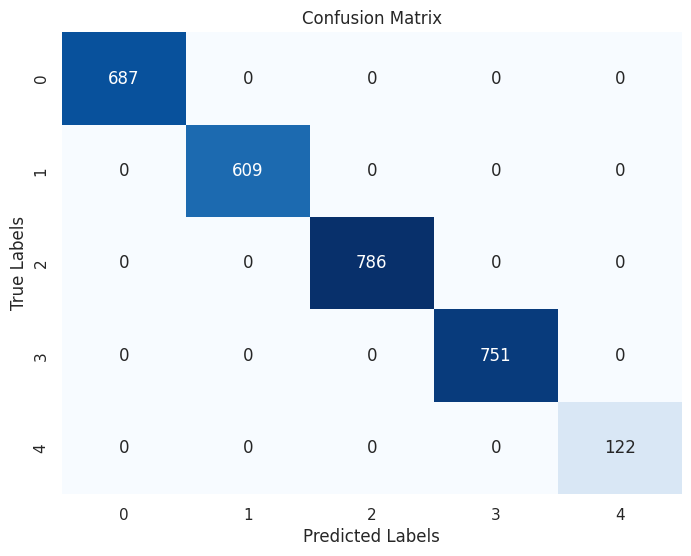

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       687
           1       1.00      1.00      1.00       609
           2       1.00      1.00      1.00       786
           3       1.00      1.00      1.00       751
           4       1.00      1.00      1.00       122

    accuracy                           1.00      2955
   macro avg       1.00      1.00      1.00      2955
weighted avg       1.00      1.00      1.00      2955



In [85]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Mostrar el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))


Continúa el sobreajuste.

# **2- Las Máquinas de Vectores de Soporte (SVM)🔧🔧**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Separar las características (X) y la variable objetivo (y)
X = df_numeric.drop('Sales_Bins_Encoded', axis=1)  # Características
y = df_numeric['Sales_Bins_Encoded']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo SVM: 0.27
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       687
           1       0.00      0.00      0.00       609
           2       0.27      1.00      0.42       786
           3       0.00      0.00      0.00       751
           4       0.00      0.00      0.00       122

    accuracy                           0.27      2955
   macro avg       0.05      0.20      0.08      2955
weighted avg       0.07      0.27      0.11      2955



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo SVM que hemos entrenado no está realizando predicciones precisas en el conjunto de prueba.

Tal como me habías correjido anteriormente, hay un **desbalance significativo** entre las clases del conjunto de datos.

En el reporte de clasificación, se observa que la **precisión y recall son muy bajos** para la mayoría de las clases, lo que podría sugerir un desbalance de datos en esas clases específicas.

# **3-Regresión lineal múltiple🕜🕜🕜**

Utilizamos **Global_Sales** como la variable objetivo.

Se divide el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba).

Se entrena el modelo de regresión lineal múltiple con los datos de entrenamiento.

Se realizan predicciones en el conjunto de prueba y se calculan métricas como el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2) para evaluar el rendimiento del modelo.

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separar las características (X) y la variable objetivo (y)
X = df_numeric.drop('Sales_Bins_Encoded', axis=1)  # Características
y = df_numeric['Global_Sales']  # Variable objetivo (cambia 'Global_Sales' según la variable que desees predecir)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal múltiple
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Calcular métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas de evaluación
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")


Error cuadrático medio (MSE): 0.00
Coeficiente de determinación (R^2): 1.00


El MSE de 0.00 significa que las predicciones del modelo son exactamente iguales a los valores reales en el conjunto de prueba.

Un R^2 de 1.00 significa que el modelo explica perfectamente la variabilidad de los datos en el conjunto de prueba.

El sobreajuste ocurre cuando el modelo se adapta demasiado bien a los datos de entrenamiento y no generaliza bien a nuevos datos. Puede suceder si el modelo es demasiado complejo o si se usan demasiadas características en relación con la cantidad de datos disponibles.

Intentamos mejorar esto:

In [90]:
from sklearn.linear_model import LassoCV

# Inicializar el modelo LassoCV (Lasso con validación cruzada para selección de alpha)
lasso_model = LassoCV(cv=5)

# Entrenar el modelo con los datos de entrenamiento
lasso_model.fit(X_train, y_train)

# Obtener las características seleccionadas por Lasso
selected_features = X.columns[lasso_model.coef_ != 0]

# Usar solo las características seleccionadas
X_selected = X[selected_features]

# Entrenar un nuevo modelo de regresión lineal con las características seleccionadas
linear_model_selected = LinearRegression()
linear_model_selected.fit(X_selected, y)

# Realizar predicciones en el conjunto de prueba con características seleccionadas
y_pred_selected = linear_model_selected.predict(X_test[selected_features])

# Calcular métricas de evaluación del modelo con características seleccionadas
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

# Mostrar las métricas de evaluación con características seleccionadas
print(f"Error cuadrático medio (MSE) con características seleccionadas: {mse_selected:.2f}")
print(f"Coeficiente de determinación (R^2) con características seleccionadas: {r2_selected:.2f}")


Error cuadrático medio (MSE) con características seleccionadas: 0.00
Coeficiente de determinación (R^2) con características seleccionadas: 1.00


Continúa siendo un modelo sobreajustado.

# **🚀🚀SMOTE + HIPERPARÁMETROS🚀🚀**

In [121]:
df = pd.read_csv('/content/gdrive/MyDrive/Coderhouse Maestu/Data Science /VideoGamesFinal.csv')

In [122]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Bins
0,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.0,0.14,1.08,Muy Alto
1,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002.0,Platform,THQ,0.53,0.41,0.0,0.14,1.08,Muy Alto
2,Imagine: Babysitters,DS,2008.0,Simulation,Ubisoft,0.63,0.35,0.0,0.10,1.08,Muy Alto
3,Namco Museum Battle Collection,PSP,2005.0,Misc,Sony Computer Entertainment,0.75,0.18,0.0,0.16,1.08,Muy Alto
4,Fisherman's Bass Club,PS2,2002.0,Sports,Agetec,0.53,0.41,0.0,0.14,1.08,Muy Alto


In [123]:
# Contar el número de datos en cada categoría de la variable de clasificación
sales_bins_counts = df['Sales_Bins'].value_counts()

# Mostrar los conteos de cada categoría
print(sales_bins_counts)


Medio       3866
Muy Alto    3648
Alto        3420
Bajo        3208
Muy Bajo     631
Name: Sales_Bins, dtype: int64


Los resultados muestran que hay una discrepancia en la distribución de las clases en la variable 'Sales_Bins'. Esto puede considerarse un **desbalance de clases**.

In [124]:
pip install imbalanced-learn


In [125]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14773 entries, 0 to 14772
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year_of_Release                         14773 non-null  float64
 1   NA_Sales                                14773 non-null  float64
 2   EU_Sales                                14773 non-null  float64
 3   JP_Sales                                14773 non-null  float64
 4   Other_Sales                             14773 non-null  float64
 5   Global_Sales                            14773 non-null  float64
 6   Sales_Bins_Encoded                      14773 non-null  int64  
 7   Genre_Action                            14773 non-null  uint8  
 8   Genre_Adventure                         14773 non-null  uint8  
 9   Genre_Fighting                          14773 non-null  uint8  
 10  Genre_Misc                              14773 non-null  ui

**Procedemos directamente a aplicar SMOTE para abordar el desbalance en la variable objetivo Sales_Bins_Encoded.**

In [126]:
from imblearn.over_sampling import SMOTE

# Definir las características y la variable objetivo
X_numeric = df_numeric.drop(['Sales_Bins_Encoded', 'Global_Sales'], axis=1)
y_numeric = df_numeric['Sales_Bins_Encoded']

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_resampled_numeric, y_resampled_numeric = smote.fit_resample(X_numeric, y_numeric)


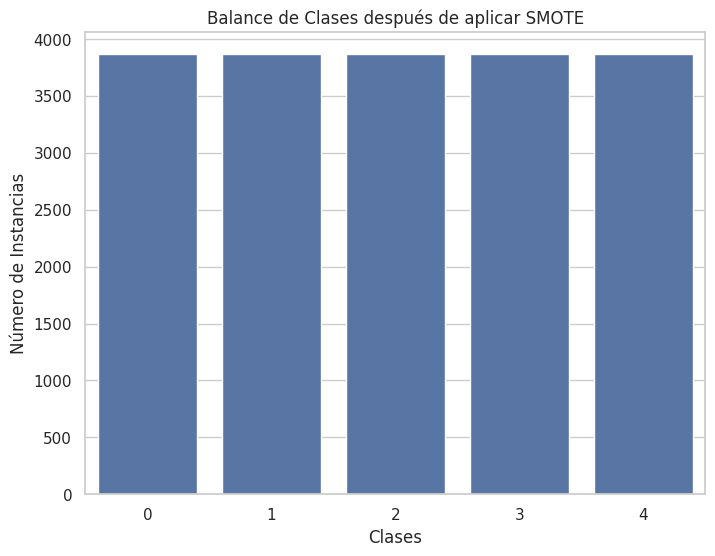

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir y_resampled_numeric a DataFrame para facilitar la visualización
y_resampled_df = pd.Series(y_resampled_numeric)

# Graficar el balance de clases
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled_df)
plt.title('Balance de Clases después de aplicar SMOTE')
plt.xlabel('Clases')
plt.ylabel('Número de Instancias')
plt.show()


**LAS CLASES ESTÁN BALANCEADAS!**

Utilizar K-fold estratificado es una práctica recomendada, especialmente en problemas de clasificación con desbalance de clases.

El K-fold estratificado es una variante de la validación cruzada K-fold estándar que asegura que cada pliegue (fold) sea representativo de las proporciones de clase originales en el conjunto de datos.

In [128]:
# Crear un DataFrame con los datos resampleados
resampled_df_numeric = pd.concat([pd.DataFrame(X_resampled_numeric), pd.DataFrame(y_resampled_numeric)], axis=1)

# Contar el número de datos en cada categoría de la variable de clasificación después de SMOTE
resampled_class_counts = resampled_df_numeric['Sales_Bins_Encoded'].value_counts()

# Mostrar los conteos de cada categoría después de SMOTE
print(resampled_class_counts)


3    3866
0    3866
2    3866
1    3866
4    3866
Name: Sales_Bins_Encoded, dtype: int64


In [129]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Suponiendo que 'resampled_df_numeric' es tu DataFrame con datos resampleados después de SMOTE

# Definir las características y la variable objetivo
X_resampled = resampled_df_numeric.drop('Sales_Bins_Encoded', axis=1)
y_resampled = resampled_df_numeric['Sales_Bins_Encoded']

# Inicializar el modelo de clasificación (Random Forest, por ejemplo)
classification_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Inicializar K-Fold estratificado con 5 folds (por ejemplo)
stratified_kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Variables para almacenar las métricas de evaluación
accuracy_scores = []
classification_reports = []

# Realizar el bucle de K-Fold estratificado
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train_fold, X_test_fold = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Entrenar el modelo con el conjunto de entrenamiento actual
    classification_model.fit(X_train_fold, y_train_fold)

    # Predecir las categorías de ventas en el conjunto de prueba actual
    y_pred_fold = classification_model.predict(X_test_fold)

    # Evaluar el modelo de clasificación en el conjunto de prueba actual
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    report = classification_report(y_test_fold, y_pred_fold)

    accuracy_scores.append(accuracy)
    classification_reports.append(report)

# Mostrar los resultados de la evaluación
print("Accuracy Scores for each fold:")
for idx, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {idx}: {accuracy}")




Accuracy Scores for each fold:
Fold 1: 0.9549922400413865
Fold 2: 0.9612002069322297
Fold 3: 0.9578375581996896
Fold 4: 0.9565442317640973
Fold 5: 0.9539575788929125


Estos puntajes de precisión sugieren que el modelo tiene una **capacidad consistente** para predecir las clases en diferentes divisiones del conjunto de datos de prueba, lo que indica una buena generalización del modelo para clasificar las categorías de ventas.

Vamos ahora a aplicar **"Halving Grid Search"** para comparar resultados.

In [130]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el clasificador RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros y sus valores a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],  # Ejemplo: variando el número de estimadores
    'max_depth': [None, 5, 10],      # Ejemplo: variando la profundidad máxima del árbol
    # Otros hiperparámetros que desees ajustar
}

# Crear el objeto HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    factor=3,            # Factor de reducción para descartar modelos (3 es el valor por defecto)
    random_state=42,
    cv=5,                # Número de folds para validación cruzada
    verbose=1,           # Nivel de verbosidad
)

# Definir características y variable objetivo
X = df_numeric.drop('Sales_Bins_Encoded', axis=1)
y = df_numeric['Sales_Bins_Encoded']

# Ejecutar la búsqueda de hiperparámetros con Halving Grid Search
halving_grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Best parameters found:")
print(halving_grid_search.best_params_)

# Mostrar la mejor puntuación (score) encontrada
print("Best score found:")
print(halving_grid_search.best_score_)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 1641
max_resources_: 14773
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 1641
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 3
n_resources: 4923
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 1
n_resources: 14769
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:
{'max_depth': None, 'n_estimators': 150}
Best score found:
0.8382943019973721


**Best parameters found:**
{'max_depth': None, 'n_estimators': 150}
**Best score found:**
0.8382943019973721

# **🎮🎮CONCLUSIONES DEL TRABAJO FINAL🎮🎮**

En este trabajo práctico, se llevó a cabo un análisis exhaustivo del conjunto de datos de ventas de videojuegos, con el objetivo de predecir las categorías de ventas mediante un modelo de clasificación. Se implementaron diversas técnicas y estrategias para abordar desafíos específicos en los datos, como el desbalanceo de clases.

Inicialmente, se exploró la distribución de las variables y se realizó una codificación adecuada de las características categóricas. Se aplicó la técnica de SMOTE para gestionar el desbalanceo de clases, generando muestras sintéticas y mejorando la capacidad del modelo para capturar patrones en clases minoritarias.

A pesar de los esfuerzos para optimizar el modelo, es importante destacar que la base de datos seleccionada no proporcionaba información fundamental para un análisis más profundo. La calidad de los datos es esencial para el éxito de cualquier modelo predictivo, y en este caso, la falta de información detallada sobre los géneros de los juegos, características específicas y tendencias del mercado limitó la capacidad del modelo para realizar predicciones más precisas.
El hecho que sólamente tengamos la fecha de salida del juego y las ventas totales, sin poder ver la evolución de ventas por ejemplo, fue un limitante.

La idea inicial detrás de este proyecto era poder predecir qué tipo de juego o género sería más exitoso en términos de ventas. Sin embargo, la limitación de información en la base de datos impidió obtener insights más profundos sobre las preferencias de los consumidores y las características clave que impulsan las ventas.

En resumen, aunque se aplicaron técnicas sólidas de procesamiento y modelado de datos, los resultados obtenidos deben interpretarse con precaución debido a las limitaciones inherentes a la calidad de la base de datos. Esta experiencia destaca la importancia de contar con conjuntos de datos ricos y detallados para realizar análisis predictivos más efectivos en el campo de los videojuegos y la industria del entretenimiento. Futuros esfuerzos podrían centrarse en la recopilación de datos más exhaustivos y representativos para garantizar un análisis más preciso y valioso.